<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction

Let's say we are now in Boston, Massachusetts in the 1970s and we work for a real estate development company. The company wants to have a price estimate for each residential project before it starts. We need to build a model that can estimate the price based on some characteristics of the house, such as: number of rooms, distance to job centers, poor or rich area, ratio of students to teachers in local schools.

<img src=https://i.imgur.com/WfUSSP7.png height=350>

To do your duty you must:

1. Analyze Boston home price data
2. Split your data for training and testing
3. Run a multivariate regression
4. How to evaluate the coefficients and residuals of our model
5. Use data transformation to improve the performance of your model
6. Use our model to estimate the price of the property

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [5]:
#%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###  Import Statements


In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [8]:
data = pd.read_csv('boston.csv', index_col=0)

# Preliminary Data Exploration 🔎

* The number of rows and columns
* The column names
* Existence of NaN or duplicate values

In [9]:
data.shape

(506, 14)

In [10]:
data.sample(5)

CRIM     ZN  INDUS  CHAS  NOX   RM   AGE  DIS   RAD    TAX  PTRATIO  \
113  0.22   0.00  10.01  0.00 0.55 6.09 95.40 2.55  6.00 432.00    17.80   
57   0.01 100.00   1.32  0.00 0.41 6.82 40.50 8.32  5.00 256.00    15.10   
449  7.53   0.00  18.10  0.00 0.71 6.42 98.30 2.19 24.00 666.00    20.20   
366  3.70   0.00  18.10  0.00 0.72 4.96 91.40 1.75 24.00 666.00    20.20   
462  6.65   0.00  18.10  0.00 0.71 6.32 83.00 2.73 24.00 666.00    20.20   

         B  LSTAT  PRICE  
113 396.90  17.09  18.70  
57  392.90   3.95  31.60  
449 304.21  19.31  13.00  
366 316.03  14.00  21.90  
462 396.90  13.99  19.50

## Data Cleaning - Check for Missing Values and Duplicates

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [12]:
print(f'Any yearly duplicated? {data.duplicated().values.any()}')

Any yearly duplicated? False


### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


## Descriptive Statistics


In [13]:
#Descriptive statistics at a glance

data.describe()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   
mean    3.61  11.36  11.14   0.07   0.55   6.28  68.57   3.80   9.55 408.24   
std     8.60  23.32   6.86   0.25   0.12   0.70  28.15   2.11   8.71 168.54   
min     0.01   0.00   0.46   0.00   0.39   3.56   2.90   1.13   1.00 187.00   
25%     0.08   0.00   5.19   0.00   0.45   5.89  45.02   2.10   4.00 279.00   
50%     0.26   0.00   9.69   0.00   0.54   6.21  77.50   3.21   5.00 330.00   
75%     3.68  12.50  18.10   0.00   0.62   6.62  94.07   5.19  24.00 666.00   
max    88.98 100.00  27.74   1.00   0.87   8.78 100.00  12.13  24.00 711.00   

       PTRATIO      B  LSTAT  PRICE  
count   506.00 506.00 506.00 506.00  
mean     18.46 356.67  12.65  22.53  
std       2.16  91.29   7.14   9.20  
min      12.60   0.32   1.73   5.00  
25%      17.40 375.38   6.95  17.02  
50%      19.05 391.44  11.36  21.20  
75%      20.20 396.23  16.96  25.00  
max      22.00 396.90  37.97  50.00

In [14]:
print(f'On average, each teacher has {(data.PTRATIO.mean()):.4} students')

On average, each teacher has 18.46 students


In [15]:
print(f'The average price of a house in the dataset is {(data.PRICE.mean()):.4}')

The average price of a house in the dataset is 22.53


In [16]:
#This kind of feature is also known as a dummy variable.
print(f'The attribute CHAS is It is a variable that accepts a boolean value. The value will be 1 if the house has access to the Charles River, 0 otherwise. The mode value of this variable is {data.CHAS.mode()}, that is, most houses do not end on the river.')

The attribute CHAS is It is a variable that accepts a boolean value. The value will be 1 if the house has access to the Charles River, 0 otherwise. The mode value of this variable is 0   0.00
Name: CHAS, dtype: float64, that is, most houses do not end on the river.


In [17]:
print(f'The minimum number of rooms in each house is {data.RM.min()}, the average is {data.RM.mean():.3} and the maximum number of rooms in each house is {data.RM.max()}')

The minimum number of rooms in each house is 3.561, the average is 6.28 and the maximum number of rooms in each house is 8.78


## Visualise the Features

creation a bar chart and superimpose the Kernel Density Estimate (KDE) for the 'PRICE', 'RM', 'DIS' and 'RAD' variables.

#### House Prices 💰

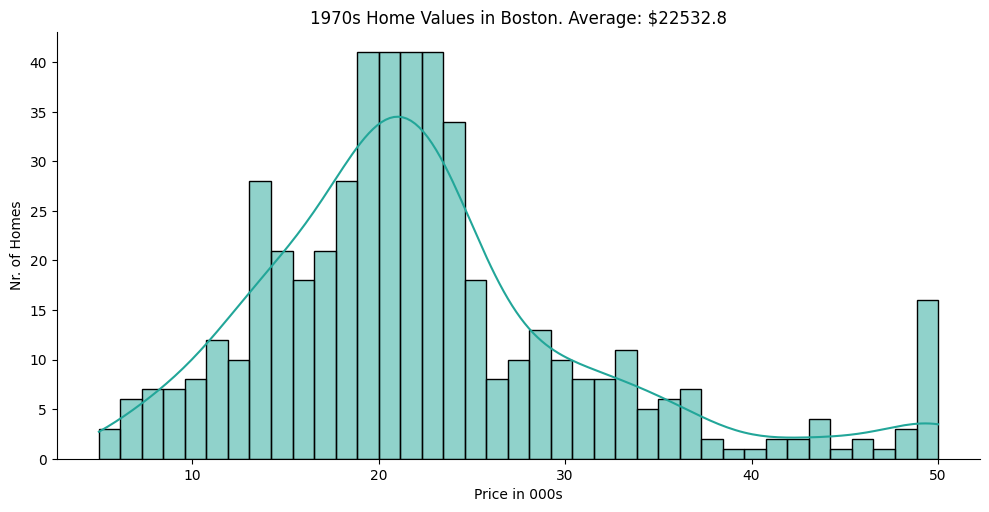

In [18]:
sns.displot(data=data.PRICE,
            kde=True,
            aspect=2,
            bins=39,
            color='#22A699')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

#### Distance to Employment - Length of Commute 🚗

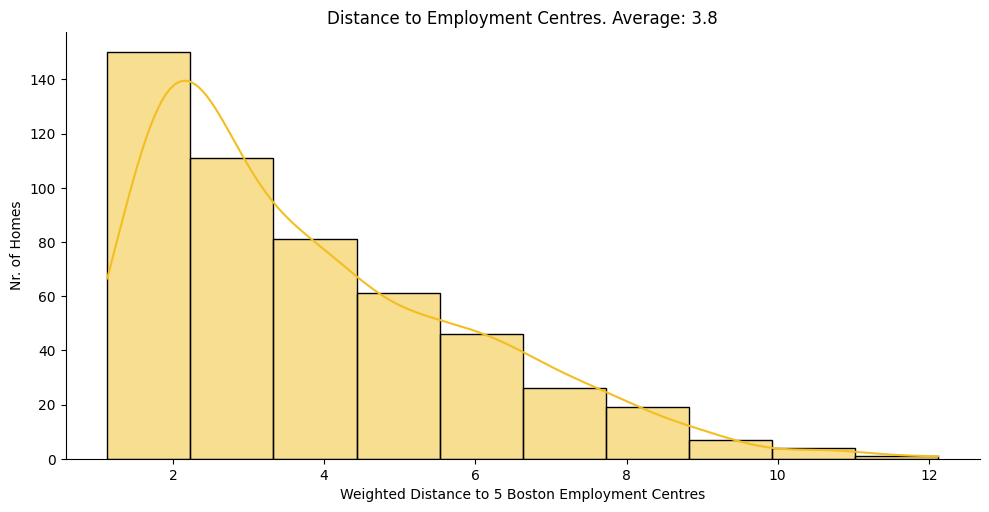

In [19]:
sns.displot(data=data.DIS,
            kde=True,
            aspect=2,
            bins=10,
            color='#F2BE22')

plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.3}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

#### Number of Rooms

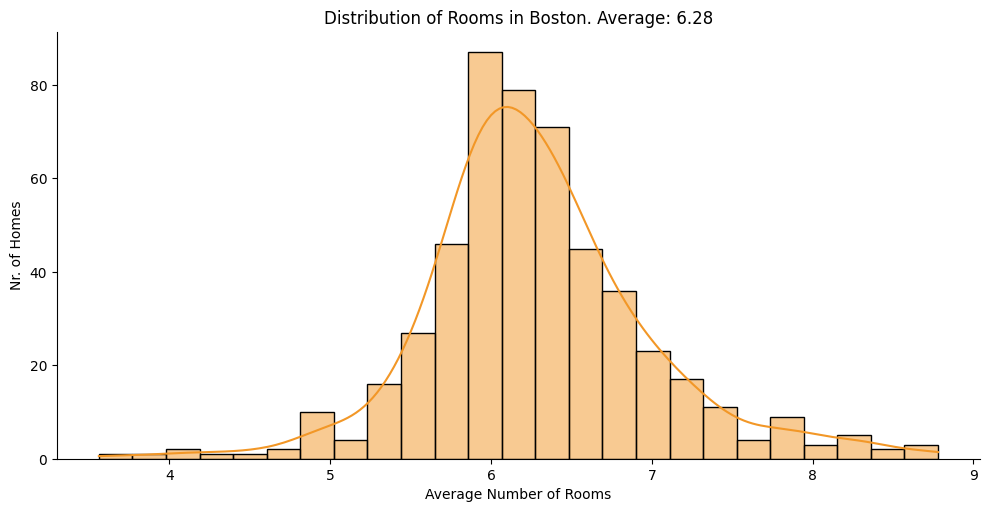

In [20]:
sns.displot(data=data.RM,
            kde=True,
            aspect=2,
            bins=25,
            color='#F29727')

plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.3}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

#### Access to Highways 🛣

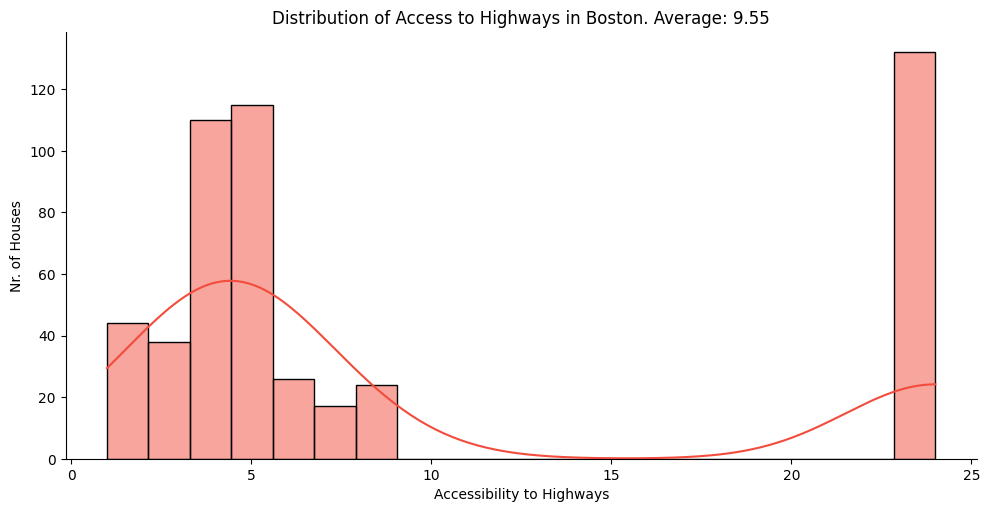

In [21]:
sns.displot(data=data.RAD,
            kde=True,
            aspect=2,
            bins=20,
            color='#F24C3D')

plt.title(f'Distribution of Access to Highways in Boston. Average: {data.RAD.mean():.3}')
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')

plt.show()

#### Next to the River? ⛵️


In [22]:
netx_to_chas = np.where(data.CHAS== 1, 'Yes', 'No')

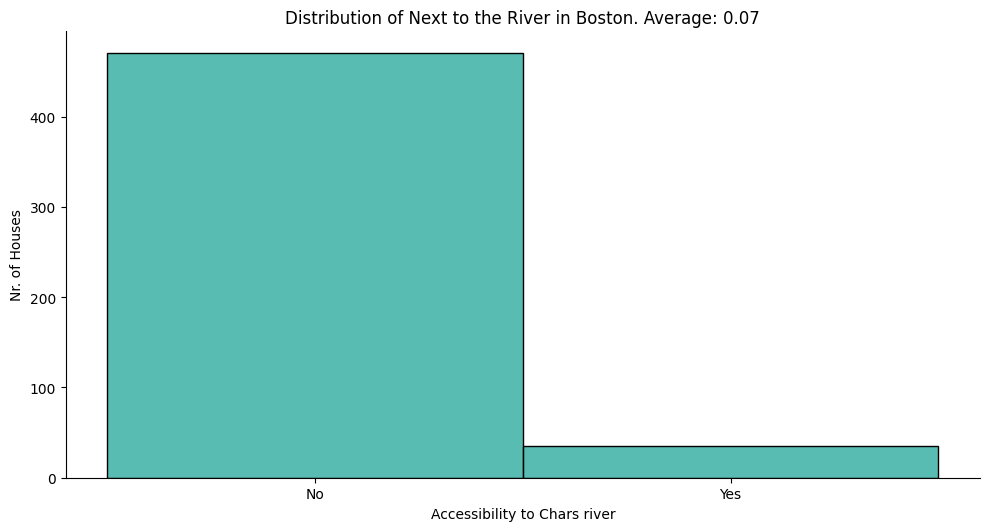

In [23]:
sns.displot(data=netx_to_chas,
            aspect=2,
            color='#22A699')

plt.title(f'Distribution of Next to the River in Boston. Average: {data.CHAS.mean():.1}')
plt.xlabel('Accessibility to Chars river')
plt.ylabel('Nr. of Houses')

plt.show()

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

Now let's go to the relationship between the Attributes. Naturally, we predict that some will have direct relationships and some will have inverse relationships.

For example, I would expect an inverse relationship between pollution (NOX) and distance to employment (DIS).
I also expect there to be a direct relationship between the number of rooms (RM) and the value of the house (PRICE).
Or even if the poverty rate in a region (LSTAT) is higher, I expect housing prices to decrease.

For further investigation, I will draw their graphs two by two.(Seaborn.pairplot())

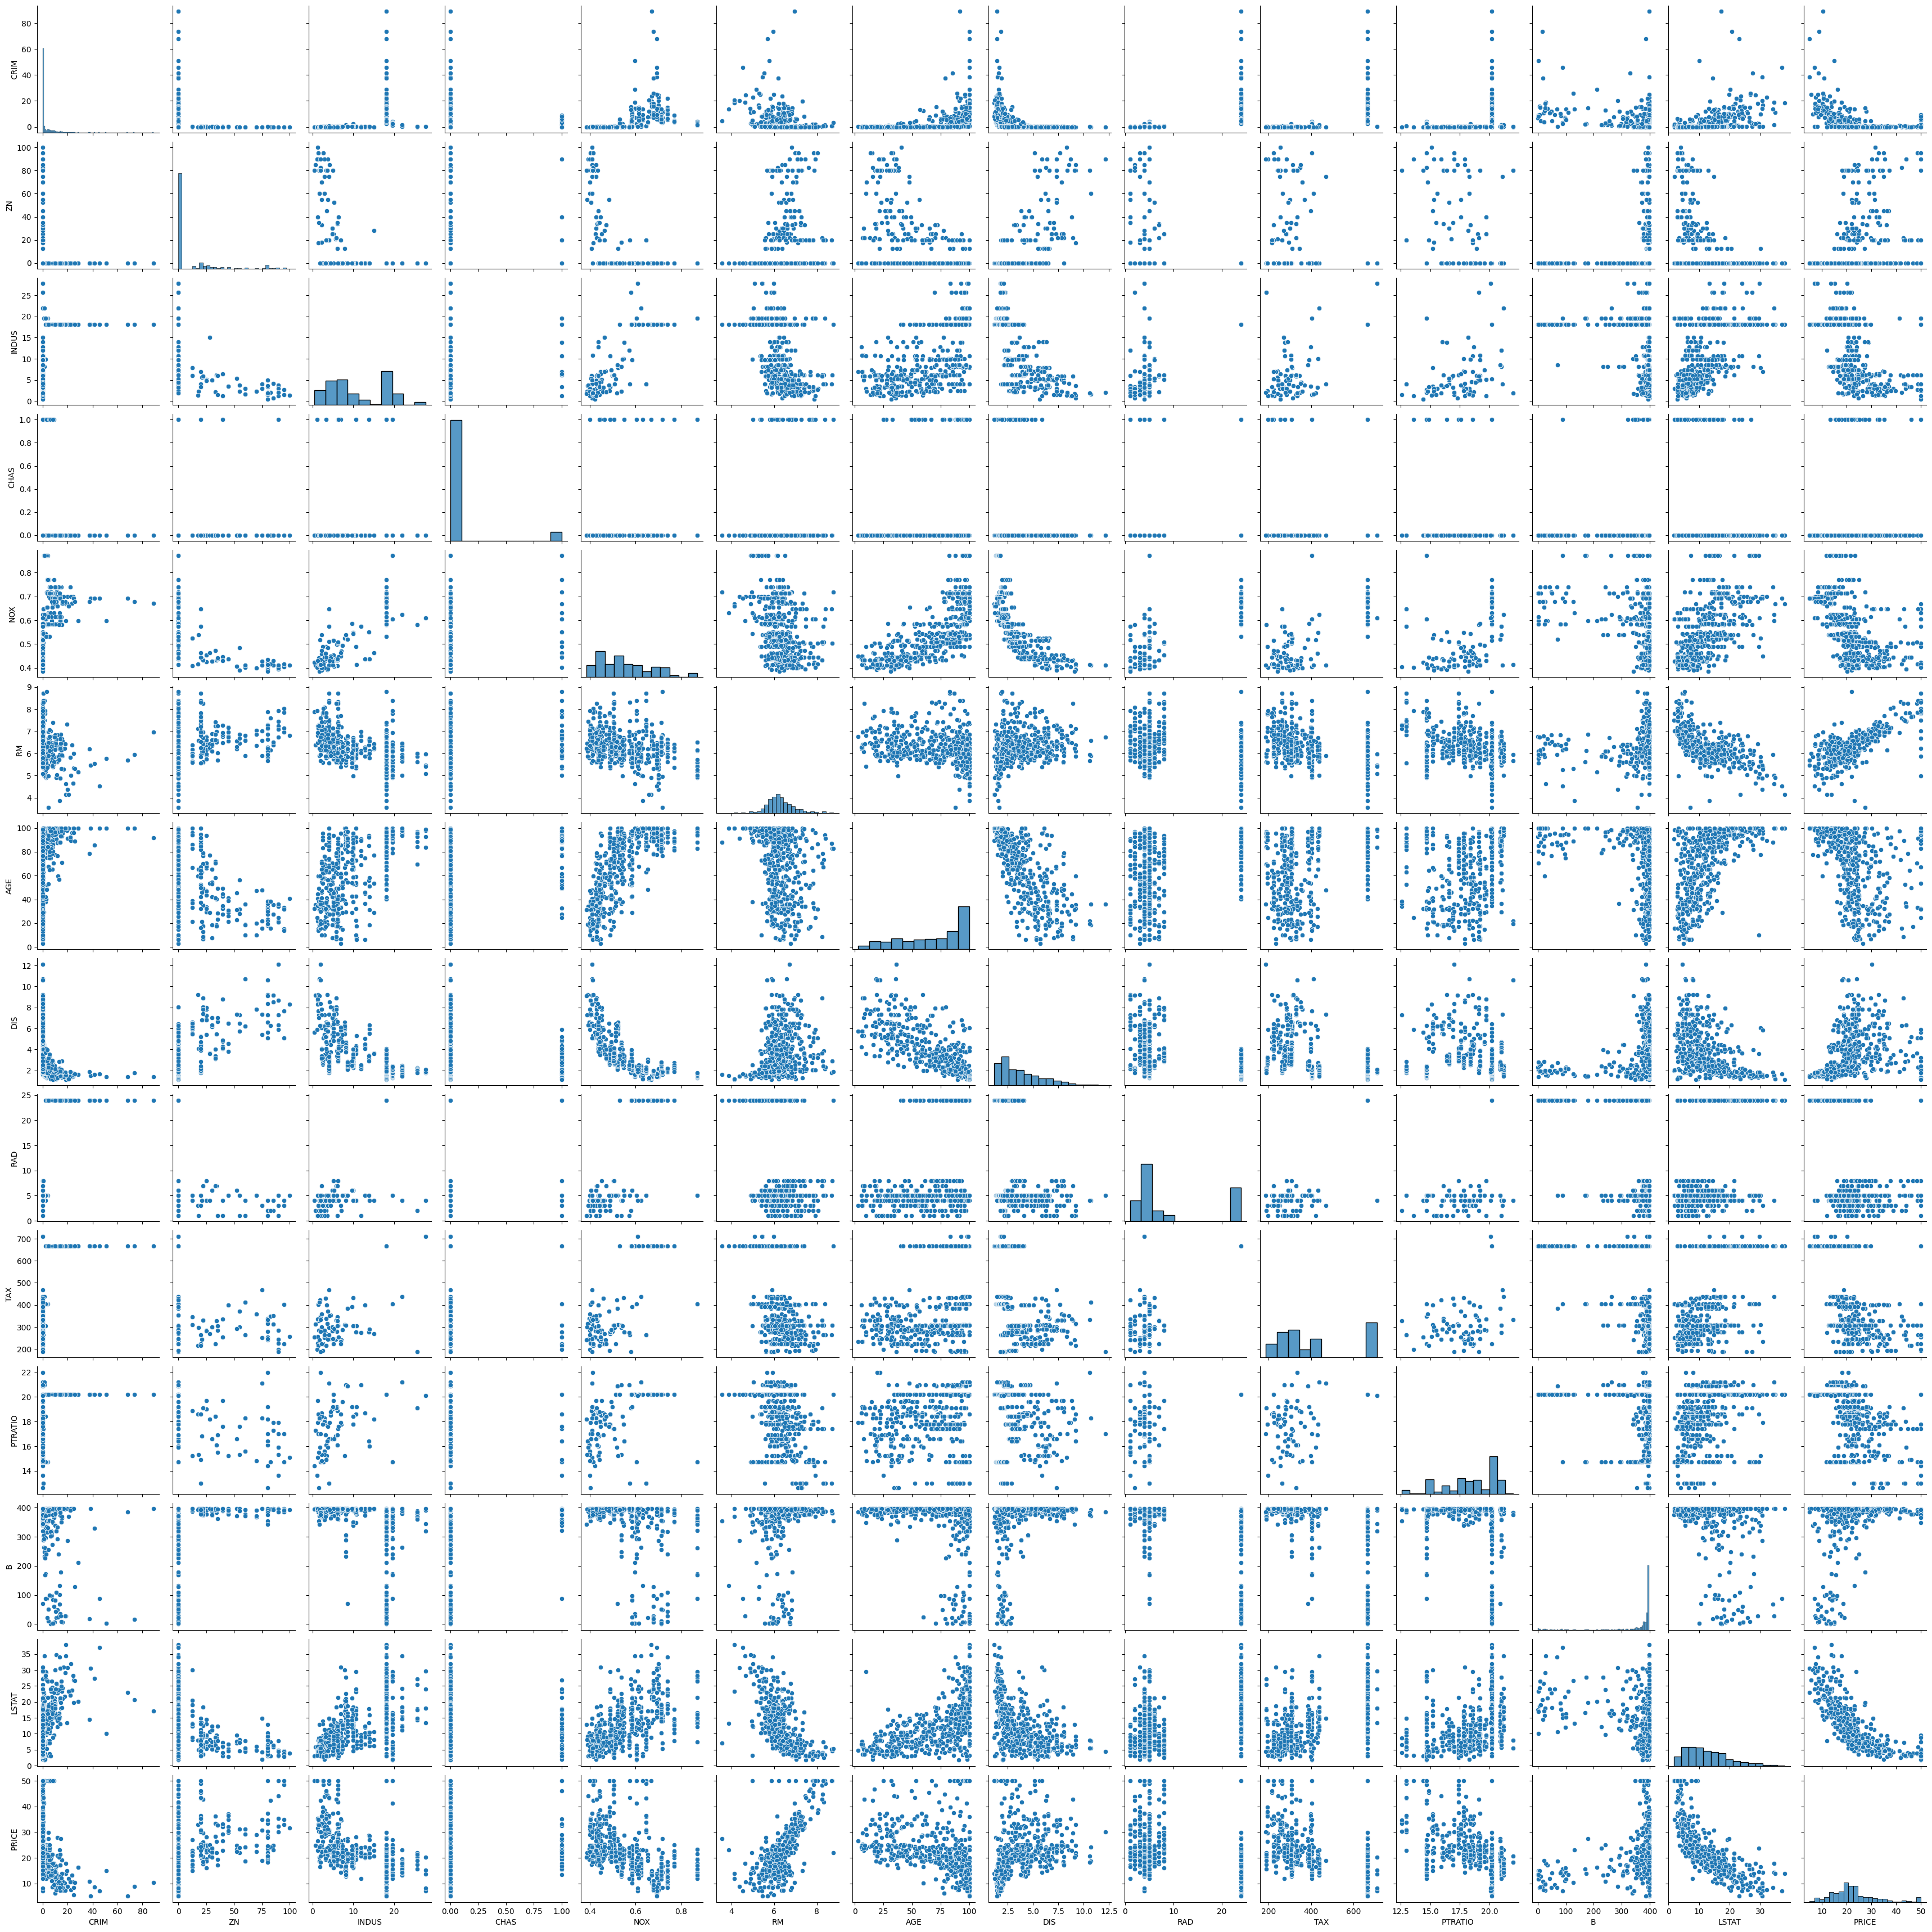

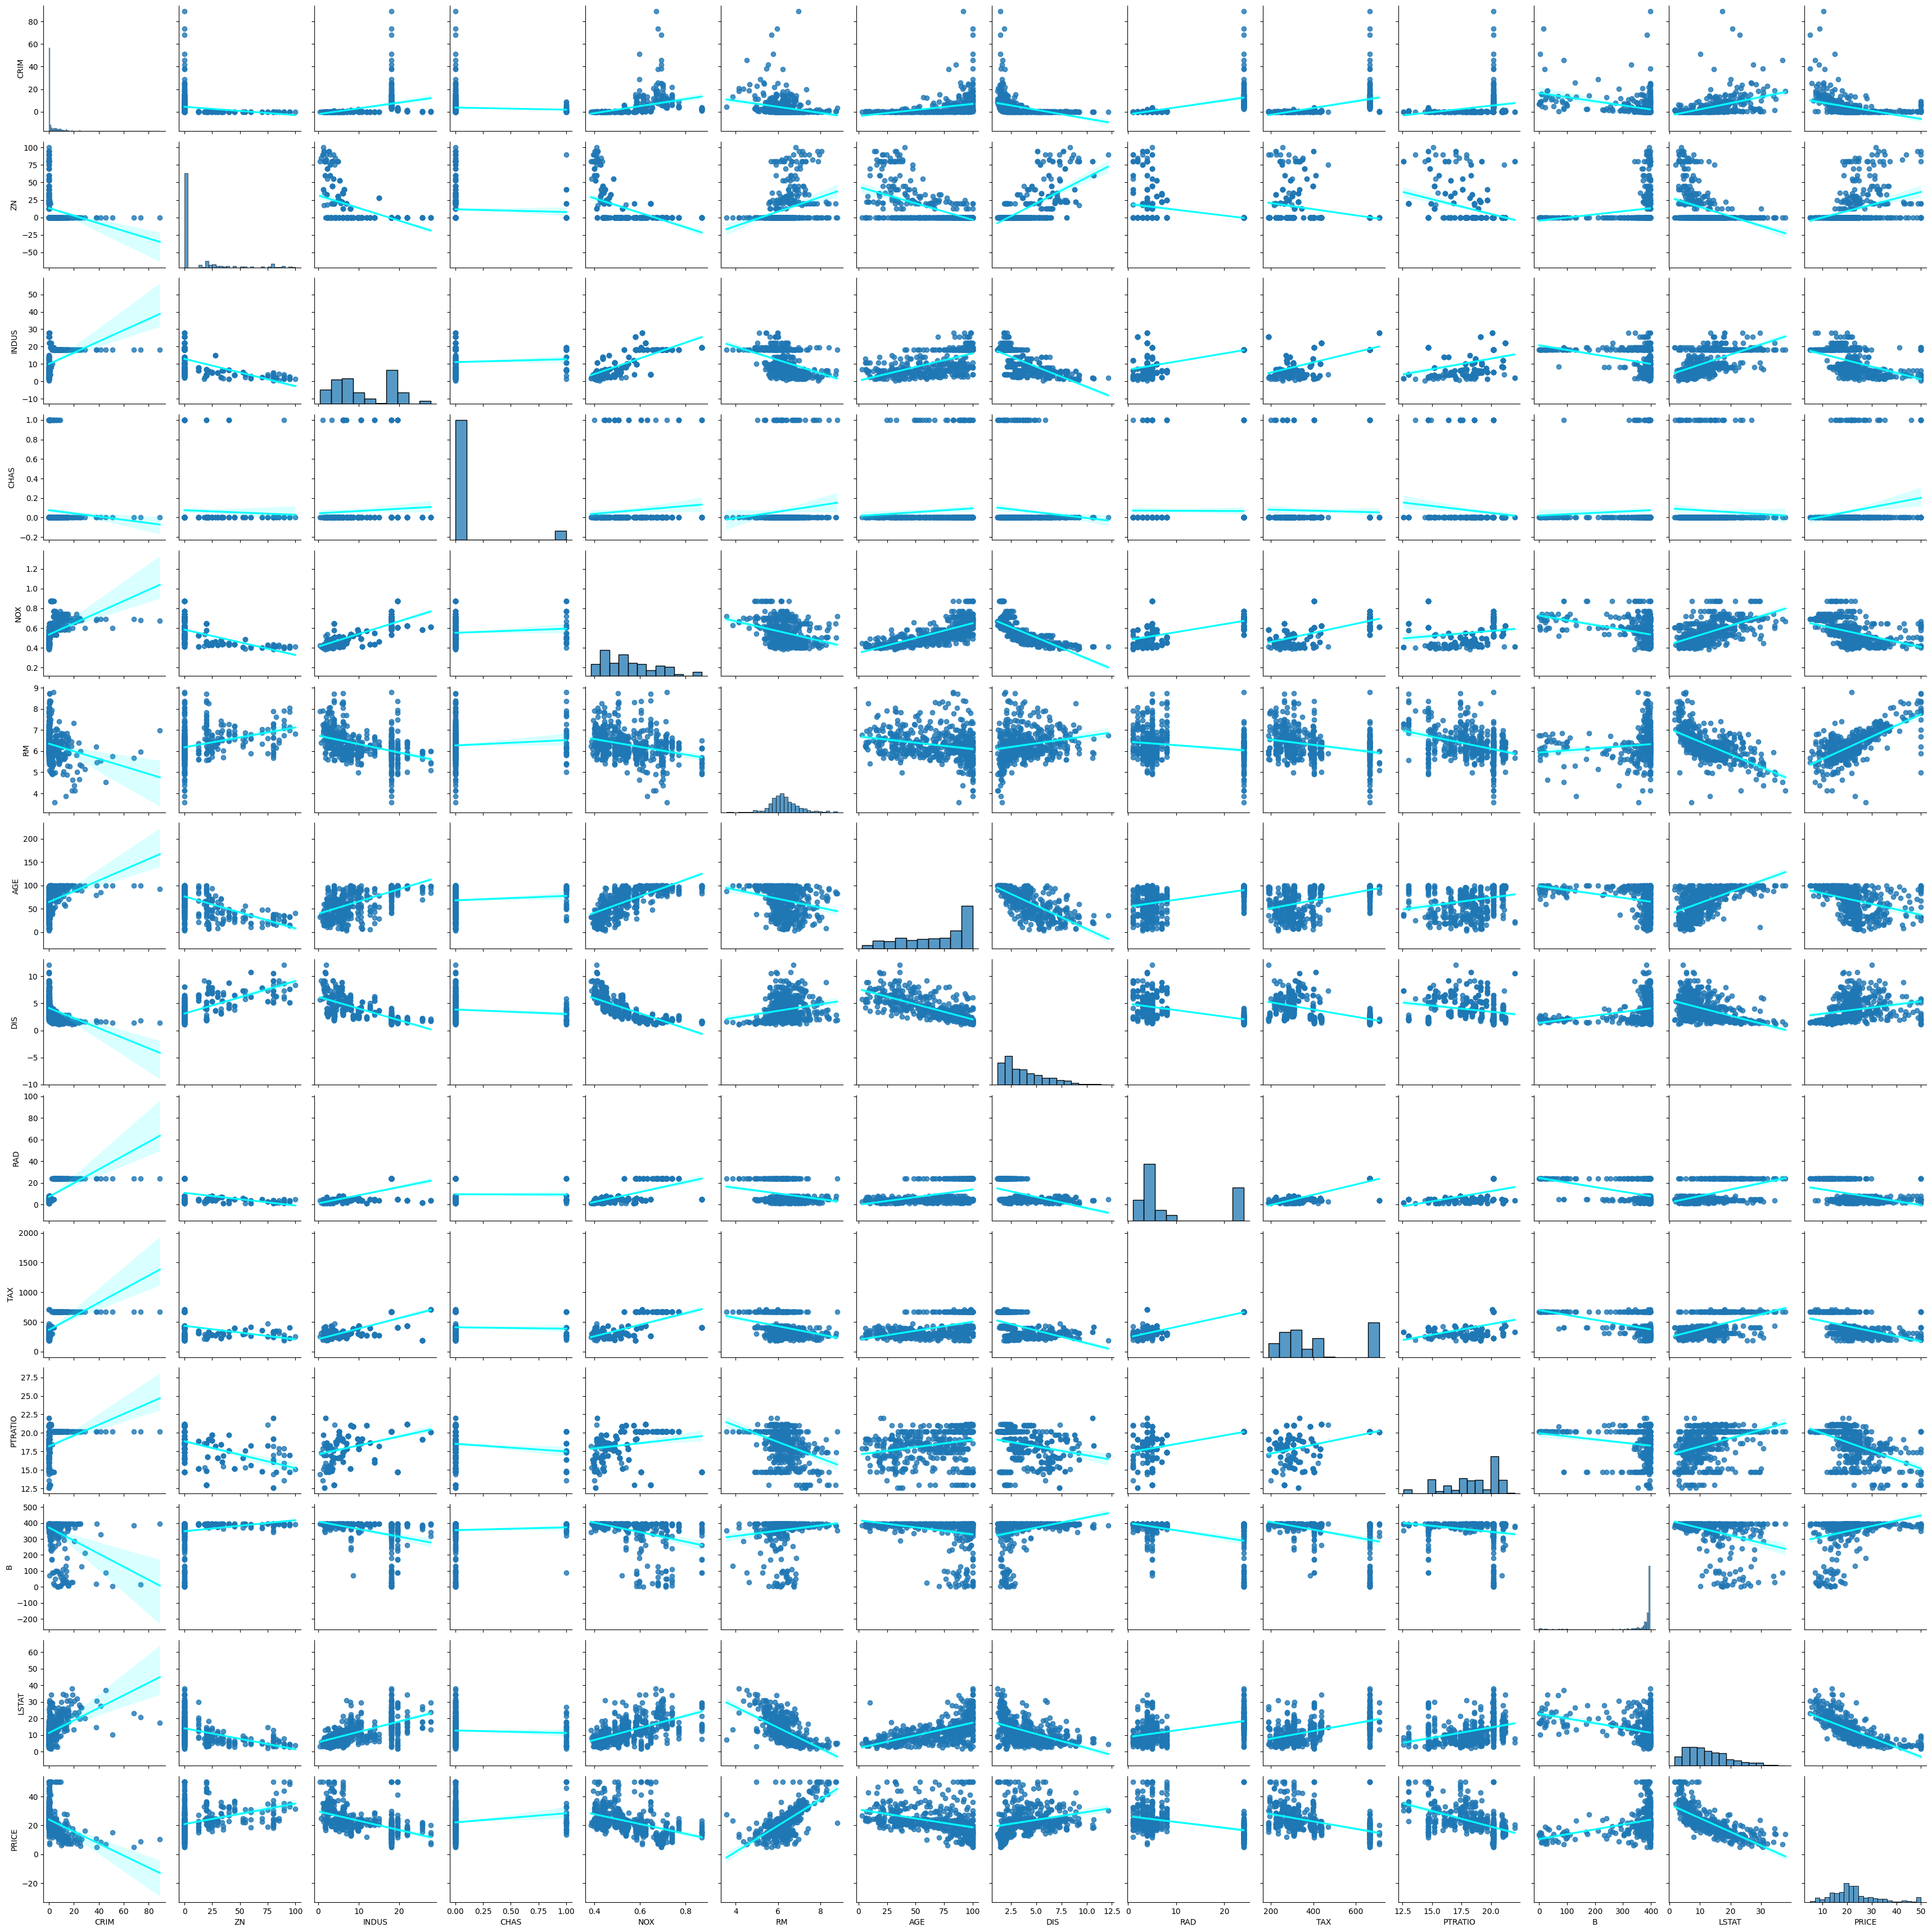

In [24]:
sns.pairplot(data)
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

The relationship between pollution (NOX) and distance to employment (DIS) is definitely inverse and seems to have an exponential distribution.

It was also found that there is a direct relationship between the number of rooms (RM) and the value of the house (PRICE).(but not very strong)

Also, there is a strong inverse relationship between the poverty rate in a region (LSTAT) and the value of the house (PRICE).

Let's examine a few more important relationships in more detail:

* DIS and NOX
* INDUS vs. NOX
* LSTAT vs. RM
* LSTAT vs. PRICE
* RM vs. PRICE

This time we want to have some opacity or "alpha" in the scatterplots as well.

#### Distance from Employment vs. Pollution


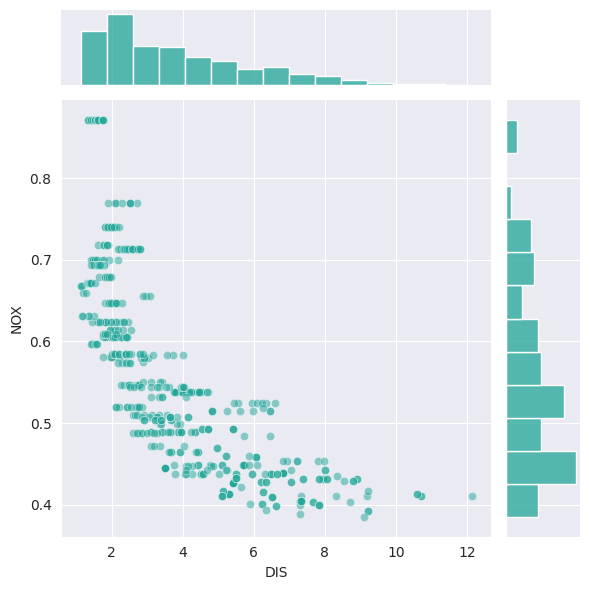

In [44]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['DIS'],
                y=data['NOX'],
                kind='scatter',
                color='#22A699',
                joint_kws={'alpha':0.5})

plt.show()

We can almost see that as we leave the city, the pollution decreases.

  However, even within the same 2-mile distance from employment centers, we can get very different levels of pollution.

Also, the 9-mile and 12-mile DIS have very similar levels of contamination.

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution


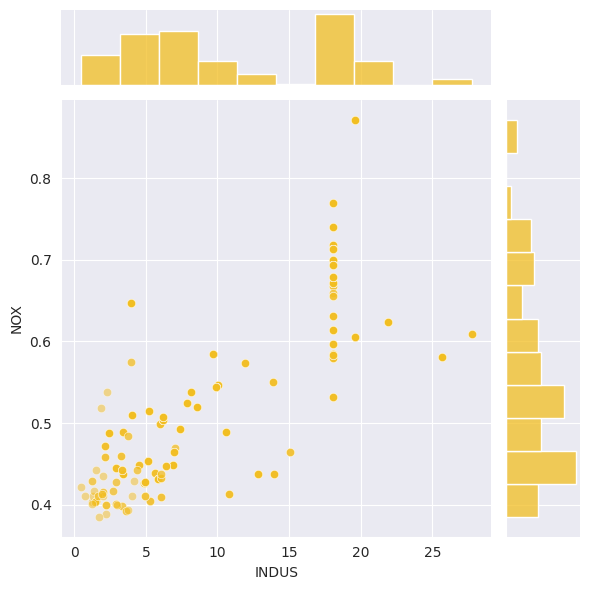

In [45]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['INDUS'],
                y=data['NOX'],
                kind='scatter',
                color='#F2BE22',
                joint_kws={'alpha':0.5})

plt.show()

No strong correlation can be found between non-retail industry and pollution. Although, when the number of non-retail industry is between 15 and 20 (about 17), the pollution rate has increased linearly.

#### % of Lower Income Population vs Average Number of Rooms


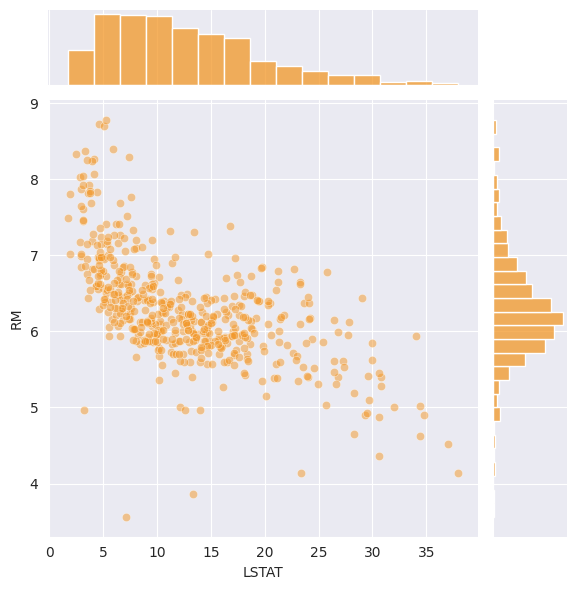

In [46]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['LSTAT'],
                y=data['RM'],
                kind='scatter',
                color='#F29727',
                joint_kws={'alpha':0.5})

plt.show()

Based on the graph, it seems that there is a very weak inverse relationship between the population and the average number of rooms.

In the top left corner we see that all the homes with 8 or more rooms, LSTAT is well below 10%.

#### % of Lower Income Population versus Home Price


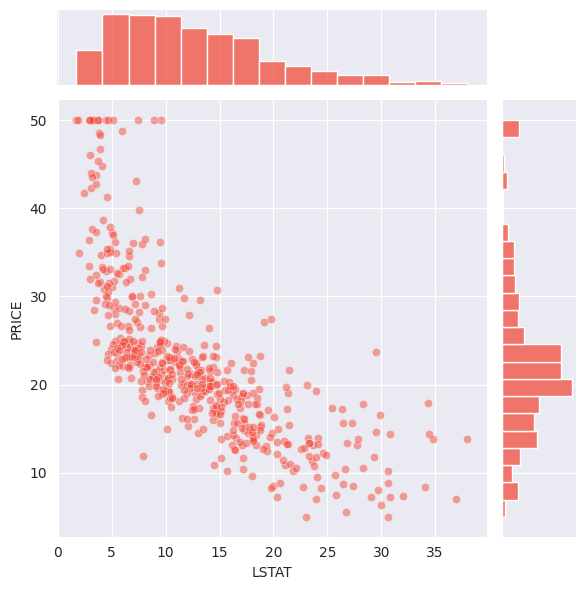

In [47]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['LSTAT'],
                y=data['PRICE'],
                kind='scatter',
                color='#F24C3D',
                joint_kws={'alpha':0.5})

plt.show()

Home Prices and the lower income population have a weak inverse relationship with each other, but defects are also found a lot.

#### Number of Rooms versus Home Value


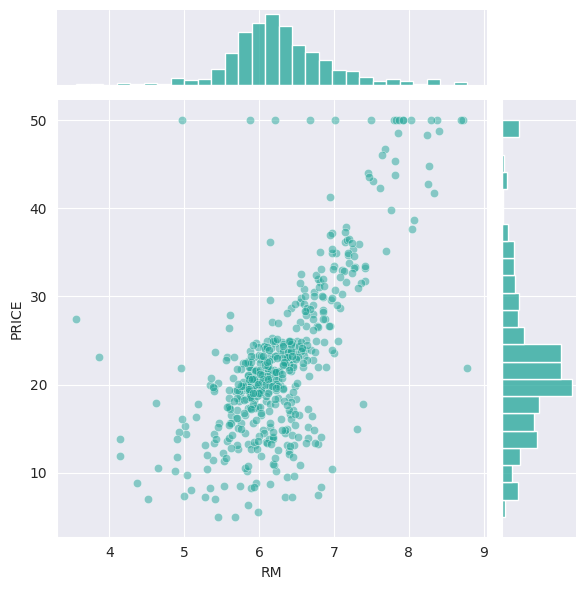

In [48]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['RM'],
                y=data['PRICE'],
                kind='scatter',
                color='#22A699',
                joint_kws={'alpha':0.5})

plt.show()

Again, we see those homes at the $50,000 mark all lined up at the top of the chart. Perhaps there was some sort of cap or maximum value imposed during data collection.

# Split Training & Test Dataset

We cannot use all 506 entries in our dataset to train our model. That's because we want to evaluate our model on data it hasn't seen yet (ie, out-of-sample data). In this way, we can have a better idea of its performance in the real world. The ideal ratio between training and testing data is approximately 20/80.


In [169]:
#create 4 subsets: X_train, X_test, y_train, y_test
target = data['PRICE']
features = data.drop('PRICE', axis=1)

#Use 'random_state' to get the same random split every time you run your notebook. This helps us get the same results every time and avoid confusion while learning.
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)

In [170]:
# % of training set
train_pct = (len(X_train)/len(features))*100
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = (X_test.shape[0]/features.shape[0])*100
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


In [171]:
X_train.describe()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 404.00 404.00 404.00 404.00 404.00 404.00 404.00 404.00 404.00 404.00   
mean    3.91  11.25  11.55   0.07   0.56   6.24  69.22   3.76   9.94 417.23   
std     9.10  23.75   6.96   0.25   0.12   0.67  27.96   2.13   8.93 172.22   
min     0.01   0.00   0.46   0.00   0.39   3.56   2.90   1.14   1.00 187.00   
25%     0.08   0.00   5.32   0.00   0.45   5.87  45.68   2.04   4.00 280.75   
50%     0.28   0.00   9.90   0.00   0.54   6.16  77.50   3.13   5.00 345.00   
75%     4.25  12.50  18.10   0.00   0.63   6.57  94.60   5.04  24.00 666.00   
max    88.98 100.00  27.74   1.00   0.87   8.78 100.00  12.13  24.00 711.00   

       PTRATIO      B  LSTAT  
count   404.00 404.00 404.00  
mean     18.55 353.55  13.06  
std       2.14  95.48   7.06  
min      12.60   0.32   1.92  
25%      17.40 374.34   7.53  
50%      19.10 391.30  11.85  
75%      20.20 396.23  17.27  
max      22.00 396.90  37.97

In [172]:
X_test.describe()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 102.00 102.00 102.00 102.00 102.00 102.00 102.00 102.00 102.00 102.00   
mean    2.44  11.83   9.52   0.08   0.54   6.46  66.03   3.93   8.02 372.61   
std     6.17  21.65   6.21   0.27   0.11   0.79  28.90   2.00   7.62 148.59   
min     0.01   0.00   1.25   0.00   0.40   4.37   6.50   1.13   1.00 193.00   
25%     0.07   0.00   4.33   0.00   0.45   6.04  40.17   2.29   4.00 276.25   
50%     0.17   0.00   7.38   0.00   0.51   6.39  76.00   3.27   5.00 307.00   
75%     1.12  20.00  18.10   0.00   0.60   6.82  91.07   5.47   8.00 403.00   
max    45.75  85.00  21.89   1.00   0.87   8.72 100.00   8.91  24.00 666.00   

       PTRATIO      B  LSTAT  
count   102.00 102.00 102.00  
mean     18.08 369.03  11.03  
std       2.22  71.43   7.26  
min      12.60  28.79   1.73  
25%      16.60 378.15   5.68  
50%      17.95 392.48   9.54  
75%      20.20 396.09  14.06  
max      21.20 396.90  36.98

# Multivariable Regression

We have a total of 13 features. Therefore, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your First Regression


In [173]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.75


R-squared can take any values between 0 to 1. The most common interpretation of r-squared is how well the regression model explains observed data. For example, an r-squared of 75% reveals that 75% of the variability observed in the target variable is explained by the regression model. Generally, a higher r-squared indicates more variability is explained by the model.

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).

In [174]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

Coefficient
CRIM           -0.13
ZN              0.06
INDUS          -0.01
CHAS            1.97
NOX           -16.27
RM              3.11
AGE             0.02
DIS            -1.48
RAD             0.30
TAX            -0.01
PTRATIO        -0.82
B               0.01
LSTAT          -0.58

In [175]:
print(f'In fact, it can be said that the increase of {regr_coef[regr_coef.Coefficient< 0].index} features will have a reducing effect and other features will have an increasing effect by increasing them.')

In fact, it can be said that the increase of Index(['CRIM', 'INDUS', 'NOX', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object') features will have a reducing effect and other features will have an increasing effect by increasing them.


In [176]:
# Premium for having an extra room
premium = regr_coef.loc['RM'].values[0] * 1000
print(f'The price premium for having an extra room is ${premium:.5}')

The price premium for having an extra room is $3108.5


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`.

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```


In [177]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)
residuals.describe()

count   404.00
mean      0.00
std       4.39
min     -13.81
25%      -2.52
50%      -0.34
75%       1.70
max      24.52
Name: PRICE, dtype: float64

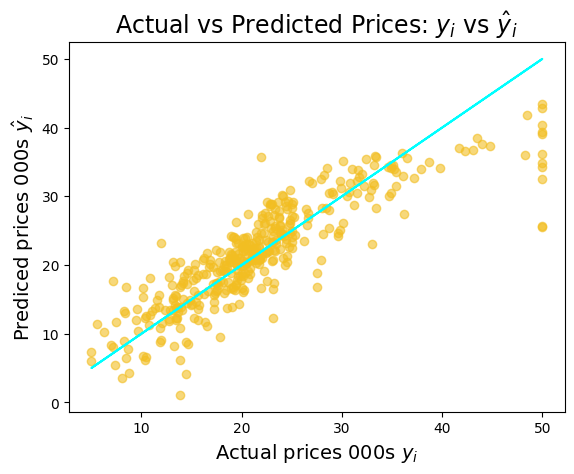

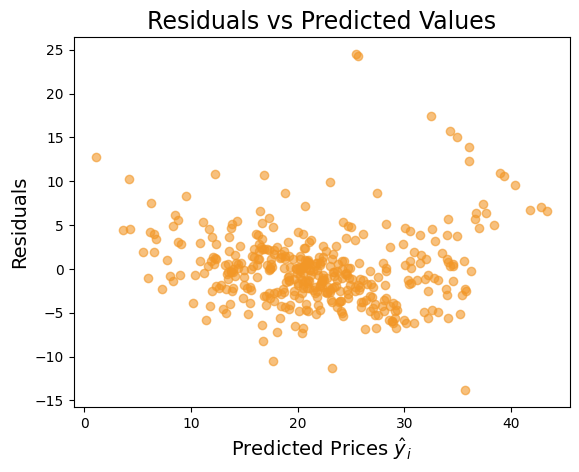

In [178]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='#F2BE22', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='#F29727', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

The interpretation of a "residuals vs. predictor plot" is identical to that of a "residuals vs. fits plot." That is, a well-behaved plot will bounce randomly and form a roughly horizontal band around the residual = 0 line. And, no data points will stand out from the basic random pattern of the other residuals.

Actually the residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the skew and the mean.
In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side.

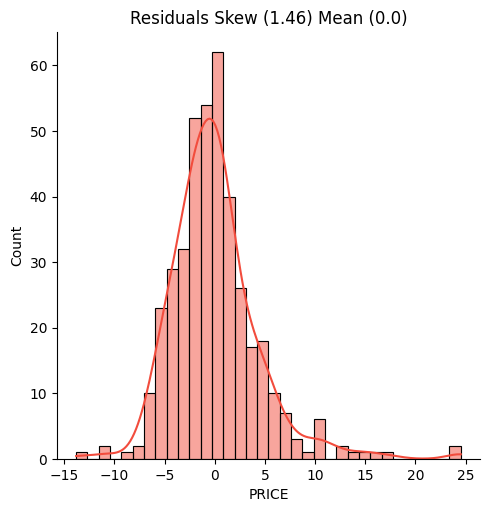

In [179]:
# Residual Distribution Chart
resid_mean = residuals.mean()
resid_skew = residuals.skew()

sns.displot(residuals, kde=True, color='#F24C3D')
plt.title(f'Residuals Skew ({resid_skew:.3}) Mean ({round(resid_mean, 2)})')
plt.show()

We see that the residuals have a skewness of 1.46. There could be some room for improvement here.

### Data Transformations for a Better Fit

We have two options at this point:

1. Change our model entirely. Perhaps a linear model is not appropriate.
2. Transform our data to make it fit better with our linear model.

we try a data transformation approach. we check if the logarithm of target data ['PRICE'] can be a suitable candidate for log transformation. using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset.

Which distribution has a skewness closer to zero?

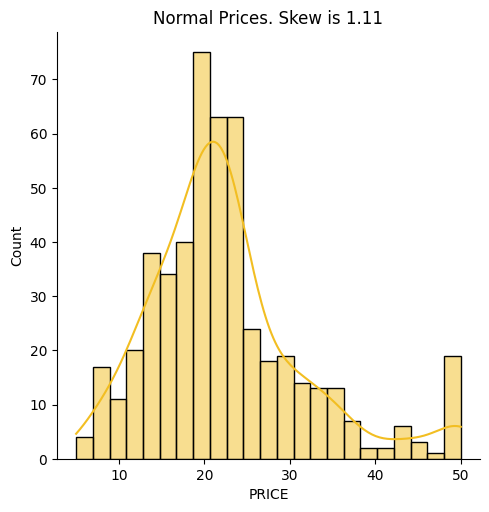

In [180]:
tgt_skew = data['PRICE'].skew()
sns.displot(data['PRICE'], kde='kde', color='#F2BE22')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

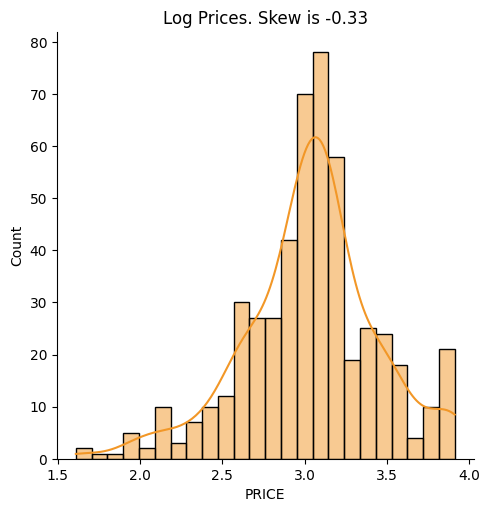

In [181]:
y_log = np.log(data['PRICE'])
sns.displot(y_log, kde=True, color='#F29727')
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

The log prices have a skew that's closer to zero. This makes them a good candidate for use in our linear model. Perhaps using log prices will improve our regression's r-squared and our model's residuals.

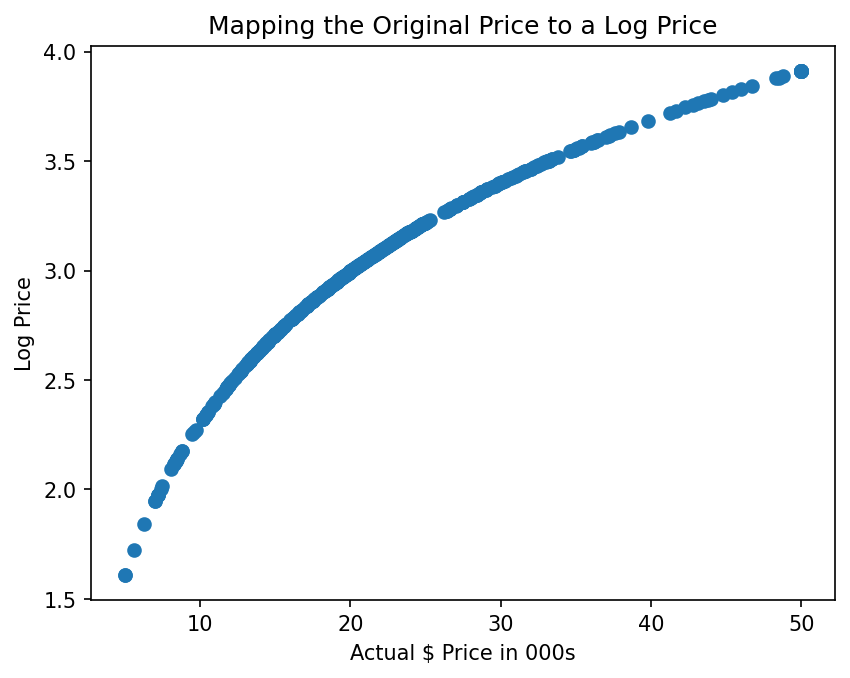

In [182]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$



In [184]:
#create 4 subsets: X_train, X_test, y_train, y_test
second_arget = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)

#Use 'random_state' to get the same random split every time you run your notebook. This helps us get the same results every time and avoid confusion while learning.
X_train, X_test, second_y_train, second_y_test = train_test_split(features,
                                                    second_arget,
                                                    test_size=0.2,
                                                    random_state=10)

In [186]:
second_regr = LinearRegression()
second_regr.fit(X_train, second_y_train)
second_rsquared = second_regr.score(X_train, second_y_train)

print(f'Training data r-squared: {second_rsquared:.2}')

Training data r-squared: 0.79


## Evaluating Coefficients with Log Prices


In [187]:
second_regr_coef = pd.DataFrame(data=second_regr.coef_, index=X_train.columns, columns=['Coefficient'])
second_regr_coef

Coefficient
CRIM           -0.01
ZN              0.00
INDUS           0.00
CHAS            0.08
NOX            -0.70
RM              0.07
AGE             0.00
DIS            -0.05
RAD             0.01
TAX            -0.00
PTRATIO        -0.03
B               0.00
LSTAT          -0.03

In [191]:
second_predicted = second_regr.predict(X_train)
second_residuals = (second_y_train - second_predicted)
second_residuals.describe()

count   404.00
mean     -0.00
std       0.18
min      -0.73
25%      -0.10
50%      -0.01
75%       0.10
max       0.77
Name: PRICE, dtype: float64

## Regression with Log Prices & Residual Plots


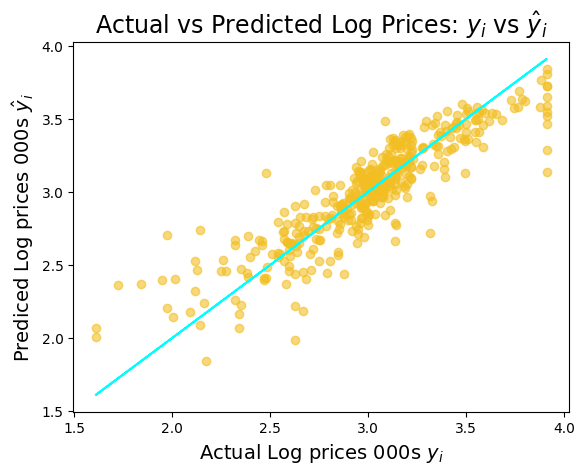

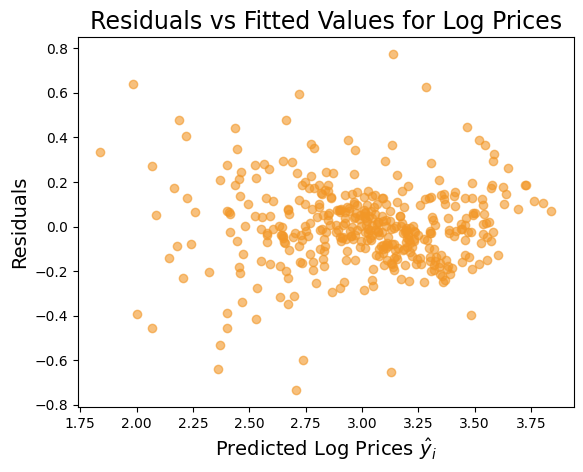

In [193]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=second_y_train, y=second_predicted, c='#F2BE22', alpha=0.6)
plt.plot(second_y_train, second_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Log prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced Log prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=second_predicted, y=second_residuals, c='#F29727', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

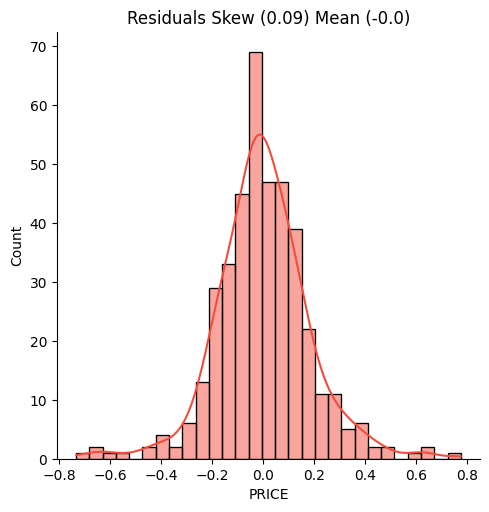

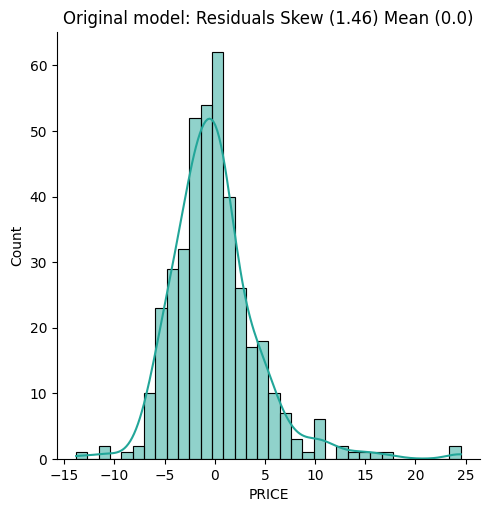

In [194]:
# Residual Distribution Chart
second_resid_mean = second_residuals.mean()
second_resid_skew = second_residuals.skew()

sns.displot(second_residuals, kde=True, color='#F24C3D')
plt.title(f'Residuals Skew ({second_resid_skew:.1}) Mean ({round(second_resid_mean, 2)})')
plt.show()

sns.displot(residuals, kde=True, color='#22A699')
plt.title(f'Original model: Residuals Skew ({resid_skew:.3}) Mean ({round(resid_mean, 2)})')
plt.show()

Our new regression residuals have a skew of 0.09 compared to a skew of 1.46. The mean is still around 0. From both a residuals perspective and an r-squared perspective we have improved our model with the data transformation.

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in.

In [196]:
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {second_regr.score(X_test, second_y_test):.2}')

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


By definition, the model has not been optimised for the testing data. Therefore performance will be worse than on the training data. However, our r-squared still remains high, so we have built a useful model.

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [197]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  3.61 11.36  11.14  0.07 0.55 6.28 68.57 3.80 9.55 408.24    18.46 356.67   

   LSTAT  
0  12.65

Let's use the statistics above to predict how much the average property is worth. What is the log price estimate and what is the dollar estimate?

In [198]:
# Make prediction
log_estimate = second_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
# or use
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.03
The property is estimated to be worth $20703.2


A property with an average value for all the features has a value of $20,700.

Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [205]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [206]:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [207]:
# Make prediction
log_estimate = second_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.25
The property is estimated to be worth $25792.0
